In [176]:
import matplotlib.pyplot as plt
import pandas as pd

### Данные о видео из трендов Youtube (Великобритания)

In [177]:

gb = pd.read_csv('GBvideos.csv')

In [178]:
gb.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...


In [179]:
import json

In [180]:
with open('GB_category_id.json', 'r', encoding='utf-8') as f: 
    gb_cat = json.load(f)

In [181]:
 gb_cat

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [182]:
df_gb_cat = pd.json_normalize(gb_cat['items'])


In [183]:
df_gb_cat['category_id'] = df_gb_cat['id'].astype(str).astype(int)

In [184]:
gb_full = pd.merge(gb,df_gb_cat,on='category_id')

In [185]:
gb_full["trending_date"] = pd.to_datetime(gb_full["trending_date"], format='%y.%d.%m')

In [280]:
gb_full['treiding_year'] = gb_full["trending_date"].dt.year
gb_full['treiding_month'] = gb_full["trending_date"].dt.strftime('%m.%Y')
gb_full

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,video_error_or_removed,description,kind,etag,id,snippet.channelId,snippet.title,snippet.assignable,treiding_year,treiding_month
0,Jw1Y-zhQURU,2017-11-14,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,...,False,Click here to continue the story and make your...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/r6Ck6Z0_L0rG37VJQ...",26,UCBR8-60-B28hp2BmDPdntcQ,Howto & Style,True,2017,11.2017
1,MyEqfBkzESU,2017-11-14,EXTREME GOLDEN TAN TRANSFORMATION,John Maclean,26,2017-11-10T20:40:44.000Z,"Extreme Tan|""Tanning""|""Tanning Bed""|""How to ge...",300617,8133,2693,...,False,-\n\n\nWebsite - http://www.johnmaclean.co.uk\...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/r6Ck6Z0_L0rG37VJQ...",26,UCBR8-60-B28hp2BmDPdntcQ,Howto & Style,True,2017,11.2017
2,b4vTZx_AtHk,2017-11-14,How To Dry a Shirt in 30 Seconds,HowToBasic,26,2017-11-09T18:36:48.000Z,"how to dry a shirt in 30 seconds|""how to dry a...",2063667,98804,11682,...,False,Today I show you how to completely dry a shirt...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/r6Ck6Z0_L0rG37VJQ...",26,UCBR8-60-B28hp2BmDPdntcQ,Howto & Style,True,2017,11.2017
3,OWvCCu2t6Ts,2017-11-14,SO Much To Tell You | 32 Weeks Pregnant | MOTH...,Sprinkleofglitter,26,2017-11-10T16:59:50.000Z,"sprinkleofglitter|""sprinkle of glitter""|""Louis...",238843,10028,248,...,False,A big chat about everything going on in my pre...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/r6Ck6Z0_L0rG37VJQ...",26,UCBR8-60-B28hp2BmDPdntcQ,Howto & Style,True,2017,11.2017
4,9GqL1DSQDL0,2017-11-14,GET READY WITH ME + LILY! (we're so immature bye),makeupbymichaelfinch,26,2017-11-09T22:00:00.000Z,"Lily brown|""michael finch""|""makeupbymichaelfin...",332967,22303,700,...,False,Hey babes! Happy Friday! It's the WEEKENDDD He...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/r6Ck6Z0_L0rG37VJQ...",26,UCBR8-60-B28hp2BmDPdntcQ,Howto & Style,True,2017,11.2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38821,JtIY1Naxg0M,2018-06-10,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1664981,44245,357,...,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,2018,06.2018
38822,JtIY1Naxg0M,2018-06-11,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1673959,44316,357,...,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,2018,06.2018
38823,JtIY1Naxg0M,2018-06-12,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1686873,44434,360,...,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,2018,06.2018
38824,JtIY1Naxg0M,2018-06-13,Game of Zones - S5E7: NBA 1K,Bleacher Report,43,2018-05-24T21:00:01.000Z,"bleacher report|""br""|""nba""|""philadelphia 76ers...",1699351,44506,361,...,False,NBA rookies are roasting each other over a gam...,youtube#videoCategory,"""m2yskBQFythfE4irbTIeOgYYfBU/0n9MJVCDLpA8q7aiG...",43,UCBR8-60-B28hp2BmDPdntcQ,Shows,False,2018,06.2018


<ipython-input-396-9f4713707cbc>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  top_genres = gb_full.groupby('snippet.title')['views','likes'].max()


Text(0.5, 0, 'Категория')

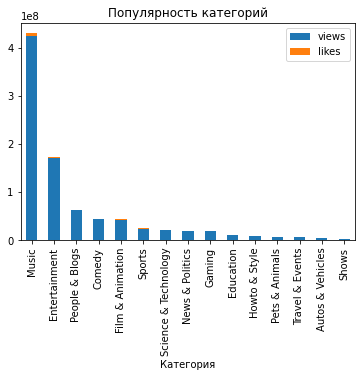

In [396]:
top_genres = gb_full.groupby('snippet.title')['views','likes'].max()

ax = top_genres.sort_values(by ='views',ascending=False).plot(kind='bar',  stacked=True)
plt.title('Популярность категорий')
plt.xlabel('Категория')
# Тут очевидно, что музыкальяные видеоклипы побеждают всех, но это и не удивляет, один и тот же клип можно смотреть много раз, фоном и тд. Количество лайков, очевидно, уступает количеству просмотров, но опять же лайкают скорей всего только первый просмотр

<AxesSubplot:ylabel='likes'>

C:\Users\anna.esina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 48169 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anna.esina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 53444 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anna.esina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anna.esina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45380 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anna.esina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\anna.esina\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarni

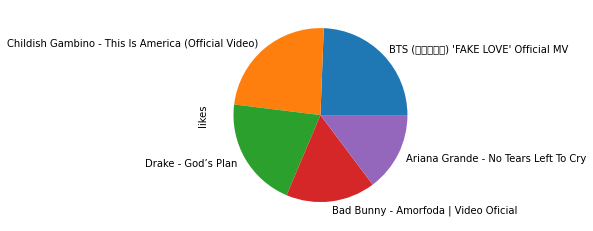

In [254]:
top_likes = gb_full.groupby('title')['likes'].max()
top_dislikes = gb_full.groupby('title')['dislikes'].max()
top_likes.sort_values(ascending=False).head(5).plot(kind='pie')




<AxesSubplot:ylabel='dislikes'>

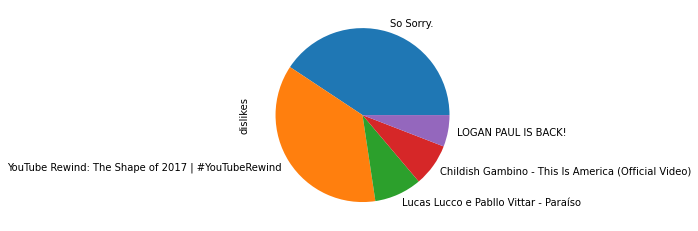

In [255]:
# тут самое забавное, что в пятерку лидеров по лайкам и дизлайкам попал один и тот же видеоклип Childish Gambino - This Is America - что указывает на то, что данная работа вызывает вызывает эмоции совершенно разнопланновые. Я посмотрела, действительно, очень неординарно)
top_dislikes.sort_values(ascending=False).head(5).plot(kind='pie',  stacked=True)

In [260]:
top_likes.sort_values(ascending=False).head(5)

title
BTS (방탄소년단) 'FAKE LOVE' Official MV                    5613827
Childish Gambino - This Is America (Official Video)    5444541
Drake - God’s Plan                                     4737873
Bad Bunny - Amorfoda | Video Oficial                   3823879
Ariana Grande - No Tears Left To Cry                   3394437
Name: likes, dtype: int64

In [400]:
import matplotlib.ticker as ticker


<AxesSubplot:xlabel='treiding_year,treiding_month'>

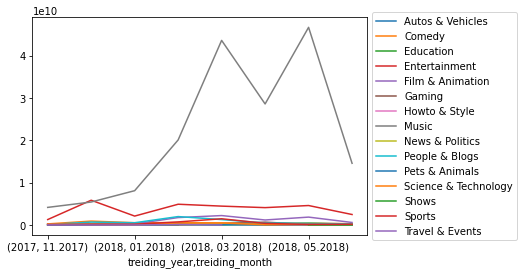

In [424]:

Vieiws_by_date = gb_full.groupby(['treiding_year','treiding_month','snippet.title'])['views'].sum().reset_index()
fig, ax = plt.subplots()
Vieiws_by_date_p = pd.pivot_table(Vieiws_by_date,index = ['treiding_year','treiding_month'], values = 'views',columns = 'snippet.title', aggfunc = 'sum')
Vieiws_by_date_p.plot(ax=ax)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

ax.xaxis.set_major_locator(ticker.MultipleLocator(2))
ax
# как изменяется скорость прироста просмотров в каждой категории, опять категория музыки явно выделяется и показывает почти драматичекий рост с ноября по март и неожиданный спад в актиновсти в апреле, графики осатльных категорий больше похоже на синусоиды - возможно, играет роль некая периодичность мероприятий (например, спортивные события, политические и тд), какие-то категории -почти прямые - ровной интерес

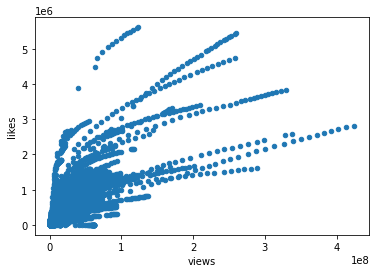

In [393]:
ax = gb_full.plot(kind='scatter', x='views', y='likes')
# тут соотношение лайков и просмотров, в принципе, опять же логично, первые просмотры лайкуются чаще, скорей всего один человек в среднем произодит один лайк, если, конечно, это не раскрутка или что-то подобное

In [ ]:
# признаюсь, что в ходе выполнения задания было много чего построено, но многое было отвергнуто из-за не наглядности или невозможности это хоть как-то объяснить)